#### Libraries

In [80]:
import pandas as pd
import datetime as dt
import statsmodels.formula.api as smf
import seaborn as sns
import matplotlib.pyplot as plt
from utilities import *
import plotly

#### Downloading data

In [2]:
# Download all data once in pickle format !!!!
data_url_AZ = 'https://stacks.stanford.edu/file/druid:yg821jf8611/yg821jf8611_az_statewide_2020_04_01.csv.zip'
data_url_IL = 'https://stacks.stanford.edu/file/druid:yg821jf8611/yg821jf8611_il_statewide_2020_04_01.csv.zip'
data_url_CT = 'https://stacks.stanford.edu/file/druid:yg821jf8611/yg821jf8611_ct_statewide_2020_04_01.csv.zip'
data_url_CA = 'https://stacks.stanford.edu/file/druid:yg821jf8611/yg821jf8611_ca_statewide_2020_04_01.csv.zip'
data_url_SC = 'https://stacks.stanford.edu/file/druid:yg821jf8611/yg821jf8611_sc_statewide_2020_04_01.csv.zip'
data_url_TX = 'https://stacks.stanford.edu/file/druid:yg821jf8611/yg821jf8611_tx_statewide_2020_04_01.csv.zip'

In [3]:
load_data_to_pickle(data_url_TX, 'df_AZ')

/opt/anaconda3/envs/ada/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3338: DtypeWarning: Columns (3,7,8,18,19,20,21,22,23,24,25,26,30,31,32,33) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


pickle-rick reporting for duty


In [6]:
# Loading in less than 1 min
df = pd.read_pickle('df_AZ')
df.shape

(3498159, 29)

#### Search rates

We define search rates by training a logistic regression over some of the features
- Search rate 1 (sr1) = ln(date + age + sex)
- Search rate 2 (sr2) = ln(date + age + sex + {interactions})

In [2]:
def plot_regression_model(model, predictors):
    '''
    Plot weights for each predictor
    Input : model -> regression model (statsmodel)
          : predictors -> name of the predictors for plot (I didn't find how to retrive them from model)
    Output : matplotlib axis
    '''
    x = predictors
    y = model.params 
    ax = sns.barplot(x=x, y=y)
    return ax

In [5]:
df = pd.read_csv('data.csv')

formula1 = 'search_conducted ~ date + C(subject_race) + C(subject_sex) + C(Partisanship)'
search_rates1, sr1 = compute_search_rates(df, formula1)
sr1.summary()

Optimization terminated successfully.
         Current function value: 0.150392
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       search_conducted   No. Observations:              1800000
Model:                          Logit   Df Residuals:                  1799994
Method:                           MLE   Df Model:                            5
Date:                Sun, 13 Dec 2020   Pseudo R-squ.:                 0.01971
Time:                        12:26:00   Log-Likelihood:            -2.7071e+05
converged:                       True   LL-Null:                   -2.7615e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
===============================================================================================
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
Intercept                      -3.1061      0.012   -266.677      0.000      -3.129      -3.083
C(subject_race)[T.hispanic]    -0.1251      0.011    -11.053      0.000      -0.147      -0.103
C(subject_race)[T.white]       -0.6753      0.010    -65.007      0.000      -0.696      -0.655
C(subject_sex)[T.male]          0.5227      0.010     54.891      0.000       0.504       0.541
C(Partisanship)[T.R]           -0.3640      0.008    -44.479      0.000      -0.380      -0.348
date                           -0.0427      0.004    -10.559      0.000      -0.051      -0.035
===============================================================================================
"""

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'Intercept'),
  Text(1, 0, 'Hispanic(1=hispanic)'),
  Text(2, 0, 'White(1=white)'),
  Text(3, 0, 'Sex(1=male)'),
  Text(4, 0, 'Partisanship(1=R)'),
  Text(5, 0, 'date')])

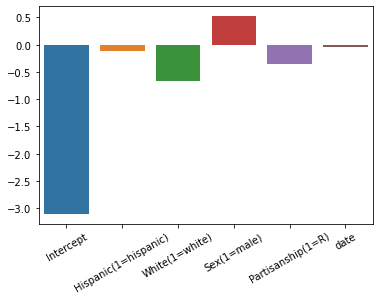

In [11]:
predictors1 = ['Intercept', 'Hispanic(1=hispanic)', 'White(1=white)', 'Sex(1=male)', 'Partisanship(1=R)','date']
ax = plot_regression_model(sr1, predictors1)
plt.xticks(rotation=30)

In [12]:
formula2 = 'search_conducted ~ date + C(subject_race):C(Partisanship) + C(subject_sex)'
search_rates2, sr2 = compute_search_rates(df, formula2)
sr2.summary()

Optimization terminated successfully.
         Current function value: 0.150300
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:       search_conducted   No. Observations:              1800000
Model:                          Logit   Df Residuals:                  1799992
Method:                           MLE   Df Model:                            7
Date:                Sun, 13 Dec 2020   Pseudo R-squ.:                 0.02031
Time:                        12:35:59   Log-Likelihood:            -2.7054e+05
converged:                       True   LL-Null:                   -2.7615e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
==================================================================================================================
                                                     coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------
Intercept                                         -2.9849      0.013   -227.815      0.000      -3.011      -2.959
C(subject_sex)[T.male]                             0.5219      0.010     54.780      0.000       0.503       0.541
C(Partisanship)[T.R]                              -0.6419      0.017    -36.717      0.000      -0.676      -0.608
C(subject_race)[T.hispanic]:C(Partisanship)[D]    -0.2858      0.015    -19.115      0.000      -0.315      -0.256
C(subject_race)[T.white]:C(Partisanship)[D]       -0.8258      0.013    -61.198      0.000      -0.852      -0.799
C(subject_race)[T.hispanic]:C(Partisanship)[R]     0.0821      0.017      4.730      0.000       0.048       0.116
C(subject_race)[T.white]:C(Partisanship)[R]       -0.4745      0.016    -29.166      0.000      -0.506      -0.443
date                                              -0.0430      0.004    -10.613      0.000      -0.051      -0.035
==================================================================================================================
"""

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Intercept'),
  Text(1, 0, 'Male'),
  Text(2, 0, 'Republican'),
  Text(3, 0, 'Hispanic*Democrate'),
  Text(4, 0, 'White*Democrate'),
  Text(5, 0, 'Hispanic*Republican'),
  Text(6, 0, 'White*Republican'),
  Text(7, 0, 'date')])

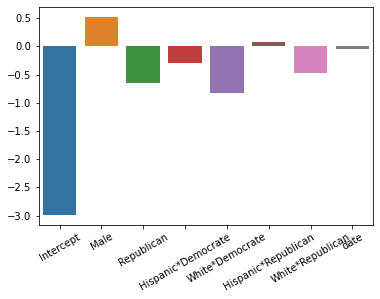

In [15]:
predictors2 = ['Intercept', 'Male', 'Republican', 'Hispanic*Democrate', 'White*Democrate', 'Hispanic*Republican', 'White*Republican', 'date']
ax2 = plot_regression_model(sr2, predictors2)
plt.xticks(rotation=30)

#### Threshold test

In [15]:
# Load data
stops = pd.read_csv('opp-stops_state.csv')

In [17]:
stops.dropna().state.unique()

array(['CT', 'IL', 'NC', 'RI', 'SC', 'TX', 'WA', 'WI'], dtype=object)

In [19]:
partisanship =  {'CT':'Democrate', 'IL':'Democrate', 'NC':None, 'RI':None, 'SC':'Republican',
                 'TX':'Republican', 'WA':'Democrate', 'WI':None}

In [21]:
# Eliminate all NaN rows
stops = stops[stops.search_rate.notnull()]

# Add the number of searches
stops['searches'] = stops['search_rate']*stops['stops_per_year']

# Add partisanship (partisanship of a county is defined by it's state partisanship)
stops['partisanship'] = [partisanship[state] for state in stops.state]

# Again, eliminate states for which we could not define a concrete state affiliation
stops = stops[stops.partisanship.notnull()]

In [23]:
# To easily manage the plots with seaborn, first create one dataFrame with different columns for each race
# DataFrames white/black/hispanic
dfs = []
races = ['white', 'black', 'hispanic']
for race in races:
    df = stops[stops.subject_race==race]
    df.drop('subject_race', 1, inplace=True) # all subjects are of the same race, so no need for this column
    dfs.append(df)

# Rename the columns to dissociate them by race
initial_names = ['search_rate', 'stop_rate', 'hit_rate', 'inferred_threshold',
                 'stops_per_year', 'stop_rate_n', 'searches']
for name in initial_names:
    dfs[0].rename(columns = {name:name+'_white'}, inplace=True)
    dfs[1].rename(columns = {name:name+'_black'}, inplace=True)
    dfs[2].rename(columns = {name:name+'_hispanic'}, inplace=True)

# Merge the columns in one dataFrame
df_final = pd.merge(dfs[0], dfs[1], on=['state','city', 'geography', 'subgeography', 'partisanship'])
df_final = pd.merge(df_final, dfs[2], on=['state','city', 'geography', 'subgeography', 'partisanship'])

# The plots also need the number of searches per county
df_final['total_searches'] = df_final['searches_white']+df_final['searches_black']+df_final['searches_hispanic']

In [30]:
identity8 = np.linspace(0, 0.8, 100)
identity5 = np.linspace(0,0.5,100)

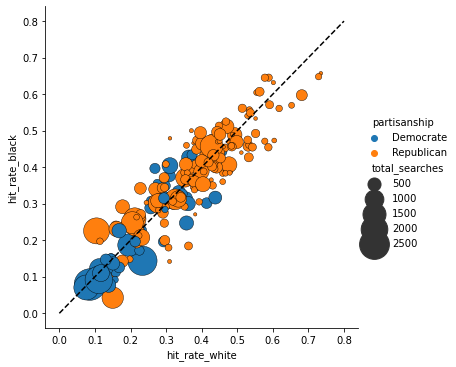

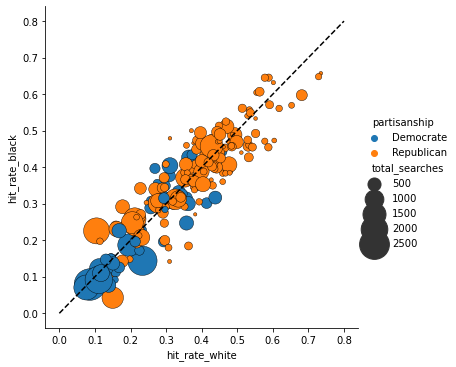

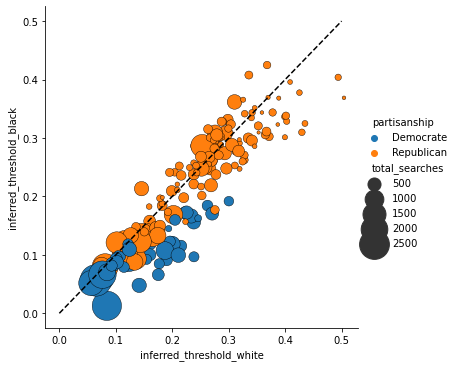

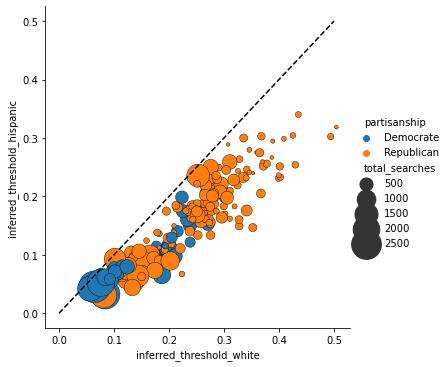

In [36]:
g = sns.relplot(data=df_final, x="hit_rate_white", y="hit_rate_black", size="total_searches", hue='partisanship',
               sizes=(10,1000), facecolor='none', edgecolor='black')
plt.plot(identity8, identity8, linestyle='--', color='k')

g = sns.relplot(data=df_final, x="hit_rate_white", y="hit_rate_black", size="total_searches", hue='partisanship',
               sizes=(10,1000), facecolor='none', edgecolor='black')
plt.plot(identity8, identity8, linestyle='--', color='k')

g = sns.relplot(data=df_final, x="inferred_threshold_white", y="inferred_threshold_black", size="total_searches", hue='partisanship',
               sizes=(10,1000), facecolor='none', edgecolor='black')
plt.plot(identity5, identity5, linestyle='--', color='k')

g = sns.relplot(data=df_final, x="inferred_threshold_white", y="inferred_threshold_hispanic", size="total_searches", hue='partisanship',
               sizes=(10,1000), facecolor='none', edgecolor='black')
plt.plot(identity5, identity5, linestyle='--', color='k')

#### Time series

In [53]:
# Downloading data
time = pd.read_csv('data_time.csv')

In [54]:
# Compute the search rates in a new column
#formula2 = 'search_conducted ~ date + C(subject_race):C(Partisanship) + C(subject_sex)'
#time['search_rate'], _ = compute_search_rates(time, formula2)

In [55]:
# Convert time into datetime objects
time.date = pd.to_datetime(time.date)

In [56]:
time.State.unique()

array(['AZ', 'TX', 'IL', 'WA'], dtype=object)

In [57]:
# Sample data by race and subject_race
time_sampled = time.groupby(['subject_race', 'Partisanship']).resample('1M', on='date').mean()
time_sampled = time_sampled.reset_index()

In [58]:
time_sampled

,subject_race,Partisanship,date,search_conducted
0,black,D,2012-01-31,0.081146
1,black,D,2012-02-29,0.088918
2,black,D,2012-03-31,0.080583
3,black,D,2012-04-30,0.089849
4,black,D,2012-05-31,0.078580
...,...,...,...,...
355,white,R,2016-08-31,0.039929
356,white,R,2016-09-30,0.034133
357,white,R,2016-10-31,0.034789
358,white,R,2016-11-30,0.038319


<AxesSubplot:xlabel='date', ylabel='search_rate'>

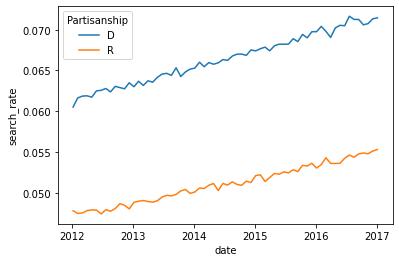

In [57]:
sns.lineplot(data=time_sampled[time_sampled.subject_race == 'black'], x='date', y='search_rate', hue='Partisanship')

In [41]:
import plotly.express as px
import pandas as pd

fig = px.line(time_sampled, x='date', y='search_conducted', color='Partisanship', line_dash='subject_race', title='Search rate over time')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [70]:
blck = time_sampled[time_sampled.subject_race=='black'].set_index('date')
hisp = time_sampled[time_sampled.subject_race=='hispanic'].set_index('date')
whit = time_sampled[time_sampled.subject_race=='white'].set_index('date')

In [71]:
blck['bias'] = blck.search_conducted/whit.search_conducted
hisp['bias'] = hisp.search_conducted/whit.search_conducted
time_bias = pd.concat([blck, hisp]).reset_index()

In [82]:
fig = px.scatter(time_bias, x="date", y="bias", trendline="ols", color='Partisanship', symbol='subject_race',facet_col='subject_race', title='Bias over time')
fig.update_xaxes(rangeslider_visible=True)
fig.show()
plotly.offline.plot(fig, filename = 'bias_over_time.html', auto_open=True)

'bias_over_time.html'

In [67]:
time_bias.shape

(240, 4)